In [2]:
import torch as t
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from torch.utils.data import Dataset
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('/kaggle/input/kyrgyz-language-hand-written-letter-kyrgyz-mnist/train.csv')
data

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_2490,pixel_2491,pixel_2492,pixel_2493,pixel_2494,pixel_2495,pixel_2496,pixel_2497,pixel_2498,pixel_2499
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80208,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80209,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80210,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80211,28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
target=data['label']
target.head(3)

0    2
1    2
2    2
Name: label, dtype: int64

In [6]:
features=data.drop(columns='label')
features.head(3)

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_2490,pixel_2491,pixel_2492,pixel_2493,pixel_2494,pixel_2495,pixel_2496,pixel_2497,pixel_2498,pixel_2499
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
x_train, x_test, y_train, y_test=train_test_split(data,target, test_size=0.03,random_state=42)
x_train

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_2490,pixel_2491,pixel_2492,pixel_2493,pixel_2494,pixel_2495,pixel_2496,pixel_2497,pixel_2498,pixel_2499
79995,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4613,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39607,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61454,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66763,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54886,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76820,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
device = t.device('cuda') if t.cuda.is_available else t.device('cpu')
device

device(type='cuda')

In [9]:
class KyrgyzMNISTDataset(Dataset):
  def __init__(self,x,y,device1) -> None:
     self.x=x
     self.y=y
  def __len__(self):
    return self.x.shape[0]
  def __getitem__(self,index):
    return self.x[index,:],self.y[index]

In [10]:
x_train=t.tensor(features.values).to(device)
y_train=t.tensor(target.values-1).to(device)
x_test=t.tensor(features.values).to(device)
y_test=t.tensor(target.values-1).to(device)

In [12]:
dataset_train=KyrgyzMNISTDataset(x_train,y_train,device)
# dataset_test=KyrgyzMNISTDataset(x_test,y_test,device)

In [13]:
train_loader = DataLoader(dataset_train, batch_size=512, shuffle=True)
# test_loader

In [11]:
# import torch.nn.functional as F
# class CNN(nn.Module):
#     def __init__(self, num_classes=36):
#         super(CNN, self).__init__()
#         self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5).to(device)
#         self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2).to(device)
#         self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5).to(device)
#         self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2).to(device)
#         self.fc1 = nn.Linear(16 * 9 * 9, 120).to(device)
#         self.fc2 = nn.Linear(120, 84).to(device)
#         self.fc3 = nn.Linear(84, num_classes).to(device)

#     def forward(self, x):
#         if x.dim() == 2:
#             x = x.view(-1, 1, 50, 50)
#         x = F.relu(self.conv1(x))  
#         x = self.pool1(x)         
#         x = F.relu(self.conv2(x))  
#         x = self.pool2(x)         
#         x = x.view(x.size(0), -1)  
#         x = F.relu(self.fc1(x))   
#         x = F.relu(self.fc2(x))  
#         x = self.fc3(x)          
#         return x


class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=27, padding=0).to(device)
        self.pool = nn.MaxPool2d(2, 2).to(device)
        self.conv2 = nn.Conv2d(6, 36, kernel_size=7, padding=0).to(device)
        # self.pool = nn.MaxPool2d(2, 2).to(device)
        self.conv3 = nn.Conv2d(36, 128, kernel_size=3, padding=0).to(device)
        self.fc1 = nn.Linear(128, 70).to(device)
        self.fc2 = nn.Linear(70, 45).to(device)
        self.fc3 = nn.Linear(45, 36).to(device)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # Обновлено: Поддержка данных формата (batch_size, 2500)
        if x.dim() == 2:  # Если данные уже развернуты
            x = x.view(-1, 1, 50, 50)  # Преобразуем в 4D тензор
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.relu(self.conv3(x))
        x = x.view(x.size(0), -1)  # Flatten
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [43]:
def get_size(img_size, kernel_size, stride, padding=0):
    return int(((img_size-kernel_size+2*padding)/stride)+1)

In [61]:
def param_creator(number_c_layers,img_size:int):
    a=15
    c_layer=[]
    layer_parameters={}
    last_conv=-1
    last_img_size=img_size
    while True:
        if last_img_size<=2:
            break
        else:
            layer_parameters['name']=np.random.choice(a=['pool','conv'],p=[.35,.65])
            if layer_parameters['name']=='conv':
                layer_parameters['out_channels']=np.random.randint(1,a)
                layer_parameters['kernel_size']=np.random.choice(a=np.arange(2,last_img_size),p=(np.arange(2,last_img_size)/(np.sum(np.arange(2,last_img_size))))[::-1])
                layer_parameters['stride']=np.random.randint(1,layer_parameters['kernel_size'])
                layer_parameters['padding']=np.random.choice([0,1])
                last_img_size=get_size(img_size=last_img_size,kernel_size=layer_parameters['kernel_size'],padding=layer_parameters['padding'],stride=layer_parameters['stride'])
            else:
                layer_parameters['max']=np.random.choice([True,False])
                layer_parameters['kernel_size']=np.random.choice(a=np.arange(2,last_img_size),p=(np.arange(2,last_img_size)/(np.sum(np.arange(2,last_img_size))))[::-1])
                # layer_parameters['kernel_size']=np.random.randint(2,last_img_size)
                layer_parameters['stride']=np.random.randint(1,layer_parameters['kernel_size'])
                last_img_size=get_size(img_size=last_img_size,kernel_size=layer_parameters['kernel_size'],stride=layer_parameters['stride'])    
            c_layer.append(layer_parameters.copy())
            layer_parameters.clear()
            if len(c_layer)>number_c_layers: last_img_size=1
    return c_layer        

In [84]:
C_parameters=param_creator(15,50)
C_parameters

[{'name': 'conv',
  'out_channels': 12,
  'kernel_size': 5,
  'stride': 2,
  'padding': 1},
 {'name': 'conv',
  'out_channels': 11,
  'kernel_size': 5,
  'stride': 1,
  'padding': 1},
 {'name': 'pool', 'max': True, 'kernel_size': 4, 'stride': 2},
 {'name': 'conv',
  'out_channels': 2,
  'kernel_size': 2,
  'stride': 1,
  'padding': 1},
 {'name': 'conv',
  'out_channels': 10,
  'kernel_size': 5,
  'stride': 4,
  'padding': 1},
 {'name': 'pool', 'max': False, 'kernel_size': 2, 'stride': 1}]

In [15]:
# parameters=[{'layers':(100,50,36)},
#             {'activations':('relu','tanh','')}]

In [71]:
class CNN1(nn.Module):
    def __init__(self,C_parameters,parameters=None):
        super(CNN1, self).__init__()
        self.last_conv=-1
        self.image_sizes=50
        self.last_logits_size=self.image_sizes
        self.c_index=len(C_parameters)
        self.c_layers = nn.ModuleList()
        for i in range(len(C_parameters)):
            if C_parameters[i]['name']=='conv':
                if self.last_conv==-1:
                    self.c_layers.append(nn.Conv2d(out_channels=C_parameters[i]['out_channels'],in_channels=1,kernel_size=C_parameters[i]['kernel_size'],padding=C_parameters[i]['padding'],stride=C_parameters[i]['stride']).to(device))
                    self.last_conv=i
                    self.last_logits_size=self.get_size(img_size=self.last_logits_size,kernel_size=C_parameters[i]['kernel_size'],stride=C_parameters[i]['stride'],padding=C_parameters[i]['padding'])
                else:
                    self.c_layers.append(nn.Conv2d(out_channels=C_parameters[i]['out_channels'],in_channels=C_parameters[self.last_conv]['out_channels'],kernel_size=C_parameters[i]['kernel_size'],padding=C_parameters[i]['padding'],stride=C_parameters[i]['stride']).to(device))
                    self.last_conv=i
                    self.last_logits_size=self.get_size(img_size=self.last_logits_size,kernel_size=C_parameters[i]['kernel_size'],stride=C_parameters[i]['stride'],padding=C_parameters[i]['padding'])
            elif C_parameters[i]['max']:
                self.c_layers.append(nn.MaxPool2d(kernel_size=C_parameters[i]['kernel_size'],stride=C_parameters[i]['stride']).to(device))
                self.last_logits_size=self.get_size(img_size=self.last_logits_size,kernel_size=C_parameters[i]['kernel_size'],stride=C_parameters[i]['stride'])
            else:
                self.c_layers.append(nn.AvgPool2d(kernel_size=C_parameters[i]['kernel_size'],stride=C_parameters[i]['stride']).to(device))
                self.last_logits_size=self.get_size(img_size=self.last_logits_size,kernel_size=C_parameters[i]['kernel_size'],stride=C_parameters[i]['stride'])
        self.in_num=C_parameters[self.last_conv]['out_channels']*self.last_logits_size**2
        self.relu = nn.ReLU()
        in_num=self.in_num
        for i in range(len(parameters)):
            self.c_layers.append(nn.Linear(in_num, parameters[i]).to(device))
            in_num=parameters[i]

    def forward(self, x):
        if x.dim() == 2 or x.dim() == 1:
            x = x.view(-1,1, 50, 50)
        for i in range(len(self.c_layers)):
            # print(x.shape)
            if i==self.c_index:
                x=x.view(-1,self.in_num)
                x=self.c_layers[i](x)
            elif i<self.c_index:
                x=self.c_layers[i](x)
            else:
                x=self.relu(x)
                x=self.c_layers[i](x)
        return x

    def get_size(self,img_size, kernel_size, stride, padding=0):
        return int(((img_size-kernel_size+2*padding)/stride)+1)
            
        
    def print_par(self):
        for i in self.c_layers:
            print(i)
            
    def find_divisors(self,n):
        div=n
        rows=1
        colls=1
        for i in range(1, int(n**0.5) + 1):
            if n % i == 0:
                m=n/i
                if abs(m-n)<=div:
                    rows=m
                    colls=i
        return int(rows), colls   
            
    def print_img(self,x,num_layer=1):
        x = x.view(1, 50, 50)
        plt.figure(figsize=(10,5))
        for i in range(num_layer):
            if i<self.c_index:
                x=self.c_layers[i](x)
            else: break
        img=x.detach().cpu().numpy()
        for j in range(img.shape[0]):
            rows, cols=self.find_divisors(img.shape[0])
            plt.subplot(cols,rows,j+1)
            plt.imshow(img[j], cmap='gray')
        plt.show()    


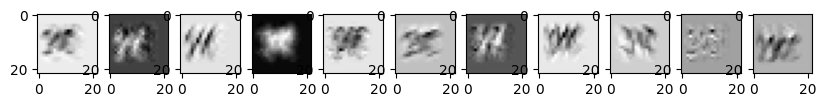

In [120]:
model.print_img(dataset_train[10000][0].to(dtype=t.float32),2)

In [89]:
# model = CNN()
model = CNN1(C_parameters,(100, 50, 36))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [118]:
num_epochs = 50

epochs=[]
losss_train=[]
losss_test=[]
mas=[]
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        images = images.to(dtype=t.float32)
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        mas.append(accuracy_score(t.max(outputs,1).indices.cpu().numpy(),labels.cpu().numpy()))
    losss_train.append(np.mean(mas))
    mas.clear()
    model.eval()
    epochs.append(epoch)
    with t.no_grad():
        x_test = x_test.to(dtype=t.float32)
        y_test = y_test.to(dtype=t.int64)
        outputs = model(x_test)
        # loss_test = criterion(outputs, y_test)
        losss_test.append(accuracy_score(t.max(outputs,1).indices.cpu().numpy(),y_test.cpu().numpy()))
    print(f'Epoch {epoch+1}, Loss: {losss_train[-1]}  test {losss_test[-1]}')

Epoch 1, Loss: 0.8610786261137157  test 0.8620298455362597
Epoch 2, Loss: 0.8612214522783308  test 0.8672908381434431
Epoch 3, Loss: 0.8608917664419  test 0.8648348771396158
Epoch 4, Loss: 0.862857514137419  test 0.8735242417064566
Epoch 5, Loss: 0.86373439017642  test 0.8727388328575169
Epoch 6, Loss: 0.865015739698713  test 0.8744218518195305
Epoch 7, Loss: 0.8666889764905581  test 0.8721902933439717
Epoch 8, Loss: 0.8658057161402396  test 0.8709810130527471
Epoch 9, Loss: 0.8660299331537068  test 0.8620173787291336
Epoch 10, Loss: 0.8684245241608607  test 0.8710682807026292
Epoch 11, Loss: 0.8675037240599959  test 0.8777504893221797
Epoch 12, Loss: 0.8685923403440612  test 0.8749080572974456
Epoch 13, Loss: 0.8693513437552534  test 0.880193983518881
Epoch 14, Loss: 0.8712734227613612  test 0.8731876379140538
Epoch 15, Loss: 0.8722560229957788  test 0.878810167927892
Epoch 16, Loss: 0.8732263288706875  test 0.8842082954134617
Epoch 17, Loss: 0.8736246369333358  test 0.877688155286549

In [24]:
# plt.plot(epochs, losss_train, label='Train Loss')
# plt.plot(epochs, losss_test, label='Test Loss')
# plt.xlabel('Epoch')
# plt.ylabel('accuracy')
# plt.legend()
# plt.title('Loss Curve')
# plt.show()

In [25]:
# sub_data=pd.read_csv('/kaggle/input/kyrgyz-language-hand-written-letter-kyrgyz-mnist/test.csv')
# sub_data

In [26]:
# data_for_pred=t.tensor(sub_data.drop(columns='id').values,dtype=t.float32).to(device)

In [27]:
# model.eval()
# pred=model(data_for_pred)
# pred

In [28]:
# submission=pd.DataFrame(data={'label':t.max(pred,1).indices.cpu().numpy()+1},index=sub_data['id'])
# submission

In [29]:
# submission.to_csv('submission.csv')